In [1]:
!pip install torchviz
!pip install timm
!pip install keras-resnet

In [2]:
import timm
from torchviz import make_dot
import torch

# 이미지 크기 및 클래스 개수 설정
num_classes = 10  # 분류할 클래스 개수
img_height, img_width = 224, 224  # 입력 이미지 크기

# PyTorch 모델 생성
resnet18_pytorch = timm.create_model('resnet18', pretrained=False, num_classes=num_classes)

# 더미 입력 데이터 생성
dummy_input = torch.randn(1, 3, img_height, img_width)  # 배치 크기 1, 채널 3, 높이 224, 너비 224

# 모델 그래프 생성 및 시각화
resnet18_graph = make_dot(resnet18_pytorch(dummy_input), params=dict(resnet18_pytorch.named_parameters()))
resnet18_graph.format = 'png'
resnet18_graph.render('resnet18_pytorch')

'resnet18_pytorch.png'

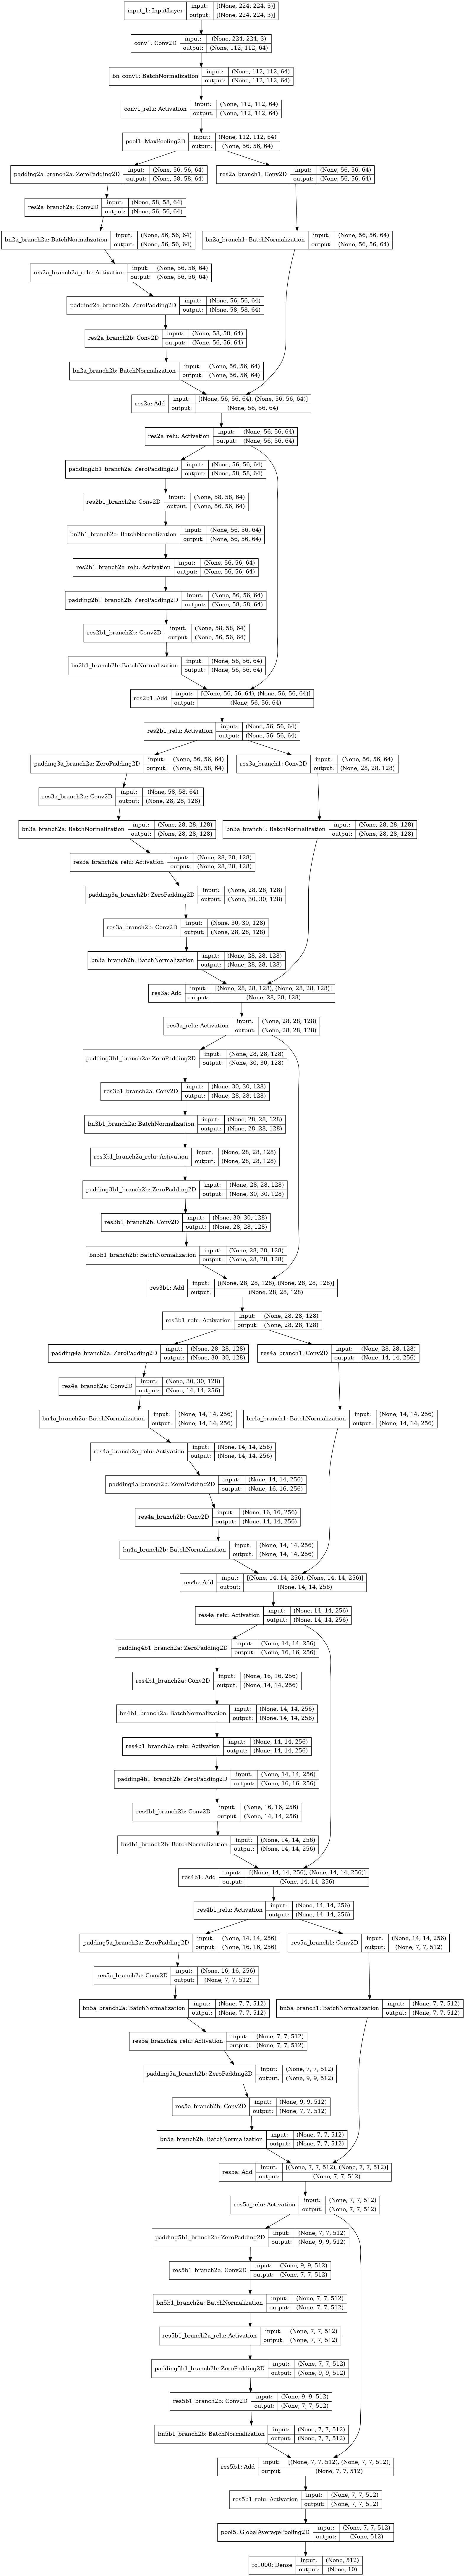

In [3]:
from tensorflow.keras.utils import plot_model
import keras_resnet.models
import tensorflow as tf

# 이미지 크기 및 클래스 개수 설정
num_classes = 10  # 분류할 클래스 개수
img_height, img_width = 224, 224  # 입력 이미지 크기

# ResNet18 모델 생성
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
resnet18_keras = keras_resnet.models.ResNet18(inputs, classes=num_classes)

# 모델 구조 저장 및 출력
plot_model(resnet18_keras, to_file='resnet18_keras.png', show_shapes=True, show_layer_names=True)
